# Setup

In [1]:
import tensorflow as tf

2024-12-12 03:54:08.108412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733986448.118780   32226 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733986448.121734   32226 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 03:54:08.133203: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Verificação de disponibilidade de GPUs

In [2]:
gpu = tf.config.list_physical_devices('GPU')

if gpu and tf.test.is_built_with_cuda():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available.")

Default GPU Device: /device:GPU:0


I0000 00:00:1733986449.987403   32226 gpu_device.cc:2022] Created device /device:GPU:0 with 13689 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:07:00.0, compute capability: 8.9


# Importação dos Dados

In [3]:
import pandas as pd

### Importação do Dataset para um Pandas DataFrame

In [4]:
df_raw = pd.read_csv('./files/combined_classified.csv')
df_raw.head()

,title,link,published,retrieved_at,author,abstract,category,isRelevant,relevanceSource,classified_at
0,Cooperative Relative Localization in MAV Swarm...,https://arxiv.org/abs/2405.18234,NaN,06/03/2024 00:00,"Changrui Liu, Sven U. Pfeiffer, Guido C. H. E....",Relative localization (RL) is essential for th...,cs.RO,0.0,Manual,06/04/2024 11:19
1,Detection-Correction Structure via General Lan...,https://arxiv.org/abs/2405.17804,NaN,06/03/2024 00:00,"Wei Li, Houfeng Wang",Grammatical error correction (GEC) is a task d...,cs.CL,0.0,Manual,06/04/2024 11:19
2,Average and Expected Distortion of Voronoi Pat...,https://arxiv.org/abs/2012.03350,NaN,06/03/2024 00:00,"Herbert Edelsbrunner, Anton Nikitenko",The approximation of a circle with the edges o...,"math.MG, math.PR",0.0,Manual,06/04/2024 11:19
3,Asynchronous BFT Asset Transfer: Quasi-Anonymo...,https://arxiv.org/abs/2405.18072,NaN,06/03/2024 00:00,"Timoth\'e Albouy (IRISA), Emmanuelle Anceaume ...",This article introduces a new asynchronous Byz...,cs.DC,0.0,Manual,06/04/2024 11:19
4,ReStorEdge: An edge computing system with reus...,https://arxiv.org/abs/2405.17263,NaN,06/03/2024 00:00,Adrian-Cristian Nicolaescu (University College...,This paper investigates an edge computing syst...,"cs.ET, cs.DB, cs.DC, cs.NI",0.0,Manual,06/04/2024 11:19


### Cópia do DataFrame para Manipulação

In [5]:
df = df_raw.copy()

# Preparando os Dados

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
df_train = df.copy()
df_train.head()

,title,link,published,retrieved_at,author,abstract,category,isRelevant,relevanceSource,classified_at
0,Cooperative Relative Localization in MAV Swarm...,https://arxiv.org/abs/2405.18234,NaN,06/03/2024 00:00,"Changrui Liu, Sven U. Pfeiffer, Guido C. H. E....",Relative localization (RL) is essential for th...,cs.RO,0.0,Manual,06/04/2024 11:19
1,Detection-Correction Structure via General Lan...,https://arxiv.org/abs/2405.17804,NaN,06/03/2024 00:00,"Wei Li, Houfeng Wang",Grammatical error correction (GEC) is a task d...,cs.CL,0.0,Manual,06/04/2024 11:19
2,Average and Expected Distortion of Voronoi Pat...,https://arxiv.org/abs/2012.03350,NaN,06/03/2024 00:00,"Herbert Edelsbrunner, Anton Nikitenko",The approximation of a circle with the edges o...,"math.MG, math.PR",0.0,Manual,06/04/2024 11:19
3,Asynchronous BFT Asset Transfer: Quasi-Anonymo...,https://arxiv.org/abs/2405.18072,NaN,06/03/2024 00:00,"Timoth\'e Albouy (IRISA), Emmanuelle Anceaume ...",This article introduces a new asynchronous Byz...,cs.DC,0.0,Manual,06/04/2024 11:19
4,ReStorEdge: An edge computing system with reus...,https://arxiv.org/abs/2405.17263,NaN,06/03/2024 00:00,Adrian-Cristian Nicolaescu (University College...,This paper investigates an edge computing syst...,"cs.ET, cs.DB, cs.DC, cs.NI",0.0,Manual,06/04/2024 11:19


### Preparando o DataFrame com o texto para o treinamento do modelo

In [8]:
df_train['text'] = 'title: ' + df['title'] + ' | author: ' + df['author'] + ' | abstract: ' + df['abstract']
df_train['text'] = df_train['text'].astype(str)
df_train['isRelevant'] = df['isRelevant'].astype(np.int64)

df_train = df_train[['text', 'isRelevant']]
df_train.head()

,text,isRelevant
0,title: Cooperative Relative Localization in MA...,0
1,title: Detection-Correction Structure via Gene...,0
2,title: Average and Expected Distortion of Voro...,0
3,title: Asynchronous BFT Asset Transfer: Quasi-...,0
4,title: ReStorEdge: An edge computing system wi...,0


### Separando os dados em conjuntos de treinamento e validação

In [9]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_train['text'], df_train['isRelevant'], test_size=0.2
)

In [10]:
train_texts = np.array(train_texts)
val_texts = np.array(val_texts)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

# Treinamento do Modelo

In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import keras_nlp

/home/luccasabbatini/miniconda3/envs/rls-rss/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Importando BERT e BERT Preprocessor do TensorFlow Hub

In [12]:
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

bert_preprocess = keras_nlp.models.BertPreprocessor.from_preset("bert_base_en_uncased", trainable=True)
bert_encoder = keras_nlp.models.BertBackbone.from_preset("bert_base_en_uncased", trainable=True)

I0000 00:00:1733986454.800565   32226 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13689 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:07:00.0, compute capability: 8.9


### Criando as camadas do BERT

In [13]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

### Criando as Camadas da Rede Neural

In [14]:
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

### Usando os Inputs e Outputs para Construir o Modelo Final

In [15]:
model = tf.keras.Model(inputs=text_input, outputs = [l], jit_compile=False)

### Arquitetura do Modelo

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_text_classifi… │ [(None, 512),     │          0 │ input_layer[0][0] │
│ (BertTextClassifie… │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_backbone       │ [(None, 768),     │ 109,482,2… │ bert_text_classi… │
│ (BertBackbone)      │ (None, 512, 768)] │            │ bert_text_classi… │
│                     │                   │            │ bert_text_classi… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ bert_backbone[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        769 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,483,009 (417.64 MB)

 Trainable params: 109,483,009 (417.64 MB)

 Non-trainable params: 0 (0.00 B)

# Treinando o Modelo

In [17]:
import os
import tensorflow as tf

os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

### Definindo as Métricas

In [18]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

### Compilando o Modelo

In [19]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=METRICS,
  jit_compile=False
)

### Treinando o Modelo

In [20]:
model.fit(train_texts, train_labels, epochs=10, verbose=1, batch_size=10)

Epoch 1/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3225s 715ms/step - accuracy: 0.8409 - loss: 0.4661 - precision: 0.1429 - recall: 0.0089
Epoch 2/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3131s 699ms/step - accuracy: 0.8402 - loss: 0.4623 - precision: 0.1199 - recall: 0.0013
Epoch 3/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3136s 700ms/step - accuracy: 0.8451 - loss: 0.4551 - precision: 0.0915 - recall: 4.3149e-04
Epoch 4/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3138s 700ms/step - accuracy: 0.8489 - loss: 0.4447 - precision: 0.0080 - recall: 1.0873e-05
Epoch 5/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3139s 701ms/step - accuracy: 0.8486 - loss: 0.4467 - precision: 0.1657 - recall: 4.4238e-04
Epoch 6/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3137s 700ms/step - accuracy: 0.8458 - loss: 0.4505 - precision: 0.1824 - recall: 0.0012
Epoch 7/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3135s 700ms/step - accuracy: 0.8485 - loss: 0.4491 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/10
4480/4480 ━━━━━━━━━━━━━━━━━━━━ 3169s 707ms/step - accuracy:

### Modelo Resultante

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_text_classifi… │ [(None, 512),     │          0 │ input_layer[0][0] │
│ (BertTextClassifie… │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_backbone       │ [(None, 768),     │ 109,482,2… │ bert_text_classi… │
│ (BertBackbone)      │ (None, 512, 768)] │            │ bert_text_classi… │
│                     │                   │            │ bert_text_classi… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ bert_backbone[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        769 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 328,449,029 (1.22 GB)

 Trainable params: 109,483,009 (417.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,966,020 (835.29 MB)

### Salvando o Modelo

In [28]:
model.save('./models/bert_relevance.h5')
model.save('./models/bert_relevance.keras')

# Avaliação do Modelo

In [30]:
model.evaluate(val_texts, val_labels)

350/350 ━━━━━━━━━━━━━━━━━━━━ 341s 964ms/step - accuracy: 0.8419 - loss: 0.4481 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.4443542957305908, 0.8436607122421265, 0.0, 0.0]

### Matriz de confusão

In [31]:
y_predicted = model.predict(val_texts)
y_predicted = y_predicted.flatten()

350/350 ━━━━━━━━━━━━━━━━━━━━ 309s 879ms/step


In [32]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(val_labels, y_predicted)
cm

array([[9449,    0],
       [1751,    0]])

Text(50.722222222222214, 0.5, 'Truth')

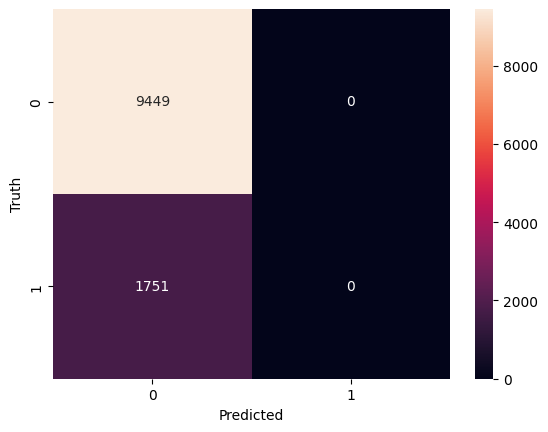

In [34]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(val_labels, y_predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      9449
           1       0.00      0.00      0.00      1751

    accuracy                           0.84     11200
   macro avg       0.42      0.50      0.46     11200
weighted avg       0.71      0.84      0.77     11200



# Classificação de Novos Dados

### Novos artigos

In [60]:
articles = [
  "title: Financial Deepening and Economic Growth in Select Emerging Markets with Currency Board Systems: Theory and Evidence | author: Manual,Yujuan Qiu | abstract: This paper investigates some indicators of financial development in select countries with currency board systems and raises some questions about the connection between financial development and growth in currency board systems. Most of those cases are long past episodes of what we would now call emerging markets. However, the paper also looks at Hong Kong, the currency board system that is one of the world's largest and most advanced financial markets. The global financial crisis of 2008 09 created doubts about the efficiency of financial markets in advanced economies, including in Hong Kong, and unsettled the previous consensus that a large financial sector would be more stable than a smaller one.",
  "title: Machine Learning Methods for Pricing Financial Derivatives | author: Lei Fan, Justin Sirignano | abstract: Stochastic differential equation (SDE) models are the foundation for pricing and hedging financial derivatives. The drift and volatility functions in SDE models are typically chosen to be algebraic functions with a small number (less than 5) parameters which can be calibrated to market data. A more flexible approach is to use neural networks to model the drift and volatility functions, which provides more degrees-of-freedom to match observed market data. Training of models requires optimizing over an SDE, which is computationally challenging. For European options, we develop a fast stochastic gradient descent (SGD) algorithm for training the neural network-SDE model. Our SGD algorithm uses two independent SDE paths to obtain an unbiased estimate of the direction of steepest descent. For American options, we optimize over the corresponding Kolmogorov partial differential equation (PDE). The neural network appears as coefficient functions in the PDE. Models are trained on large datasets (many contracts), requiring either large simulations (many Monte Carlo samples for the stock price paths) or large numbers of PDEs (a PDE must be solved for each contract). Numerical results are presented for real market data including S&amp;P 500 index options, S&amp;P 100 index options, and single-stock American options. The neural-network-based SDE models are compared against the Black-Scholes model, the Dupire's local volatility model, and the Heston model. Models are evaluated in terms of how accurate they are at pricing out-of-sample financial derivatives, which is a core task in derivative pricing at financial institutions.",
  "title: On the Law of Large Numbers for non-equally distributed weakly dependent random variables | author: Alina Akhmiarova, Alexander Veretennikov | abstract: Three versions of the Weak Law of Large Numbers are proposed for weakly dependent and generally speaking non-equally distributed random variables, with finite or possibly infinite expectations.",
  "title: Is There Still a Golden Dilemma? | author: Claude B. Erb, Campbell R. Harvey | abstract: The real, inflation-adjusted, price of gold is high. Historically, a high real gold price has been associated with low inflation-adjusted gold returns over the subsequent 10 years. Further, historically the realized 10-year rate of inflation has had close to no impact on realized 10-year nominal and real gold returns. An influx of investment in gold (from gold-owning ETFs, Costco shoppers, “de-dollarizing” central banks and possibly others) has seemingly doubled the real price of gold relative to pre-influx times. Today’s golden dilemma is yesterday’s golden dilemma: has an influx of gold buying ushered in a new age of permanently higher “this time is different” real gold prices or is this simply the latest “wash, rinse, repeat” cycle setting-up a significant fall in real gold prices? ",
  "title: Anomaly Detection in California Electricity Price Forecasting: Enhancing Accuracy and Reliability Using Principal Component Analysis | author: Joseph Nyangon, Ruth Akintunde | abstract:  Accurate and reliable electricity price forecasting has significant practical implications for grid management, renewable energy integration, power system planning, and price volatility management. This study focuses on enhancing electricity price forecasting in California's grid, addressing challenges from complex generation data and heteroskedasticity. Utilizing principal component analysis (PCA), we analyze CAISO's hourly electricity prices and demand from 2016-2021 to improve day-ahead forecasting accuracy. Initially, we apply traditional outlier analysis with the interquartile range method, followed by robust PCA (RPCA) for more effective outlier elimination. This approach improves data symmetry and reduces skewness. We then construct multiple linear regression models using both raw and PCA-transformed features. The model with transformed features, refined through traditional and SAS Sparse Matrix outlier removal methods, shows superior forecasting performance. The SAS Sparse Matrix method, in particular, significantly enhances model accuracy. Our findings demonstrate that PCA-based methods are key in advancing electricity price forecasting, supporting renewable integration and grid management in day-ahead markets. Keywords: Electricity price forecasting, principal component analysis (PCA), power system planning, heteroskedasticity, renewable energy integration.",
  "title: Machine Learning the Macroeconomic Effects of Financial Shocks | author: Niko Hauzenberger, Florian Huber, Karin Klieber, Massimiliano Marcellino | abstract: We propose a method to learn the nonlinear impulse responses to structural shocks using neural networks, and apply it to uncover the effects of US financial shocks. The results reveal substantial asymmetries with respect to the sign of the shock. Adverse financial shocks have powerful effects on the US economy, while benign shocks trigger much smaller reactions. Instead, with respect to the size of the shocks, we find no discernible asymmetries."
  "title: Generative model for financial time series trained with MMD using a signature kernel | author: Lu Chung I, Julian Seste | abstract: Generating synthetic financial time series data that accurately reflects real-world market dynamics holds tremendous potential for various applications, including portfolio optimization, risk management, and large scale machine learning. We present an approach for training generative models for financial time series using the maximum mean discrepancy (MMD) with a signature kernel. Our method leverages the expressive power of the signature transform to capture the complex dependencies and temporal structures inherent in financial data. We employ a moving average model to model the variance of the noise input, enhancing the model's ability to reproduce stylized facts such as volatility clustering. Through empirical experiments on S&amp;P 500 index data, we demonstrate that our model effectively captures key characteristics of financial time series and outperforms a comparable GAN-based approach. In addition, we explore the application of the synthetic data generated to train a reinforcement learning agent for portfolio management, achieving promising results. Finally, we propose a method to add robustness to the generative model by tweaking the noise input so that the generated sequences can be adjusted to different market environments with minimal data.",
]

### Predição

In [61]:
for article in articles:
    article = np.array([article]).astype(object)
    y_predicted = model.predict(article)
    y_predicted = np.where(y_predicted > 0.5, 'positive', 'negative')
    print(y_predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
[['negative']]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[['negative']]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[['negative']]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[['negative']]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[['negative']]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[['negative']]
